# numpy(Numerical Python)
>* 벡터와 행렬연산에 특화된 라이브러리
>* array(ndarray)단위로 데이터를 관리한다. 즉, array단위로 연산을 수행한다.
>* 2차원 ndarray는 `행렬, matrix`와 유사하다.
>* Pandas와 같이 데이터분석에 많이 사용한다.
>* `수치해석용` python 라이브러리
>
##### 참고사이트
* https://numpy.org
* http://docs.scipy.org/doc
* http://www.scipy-lectures.org/intro/numpy/index.html
* http://docs.scipy.org/doc/numpy/user/quickstart.html

### numpy cheatsheet

<img src="./images/22.데이터분석_numpy_00.python_cheat_sheet.png">

In [3]:
import numpy as np
print(f'현재 numpy버전 : {np.__version__}')
print()

print(dir(np))

현재 numpy버전 : 1.26.4

['ALLOW_THREADS', 'BUFSIZE', 'CLIP', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__former_attrs__', '__future_scalars__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_add_newdoc_ufunc', '_builtins', '_distributor_init', '_financial_names', '_get_promotion_state', '_global

### 1. 1차원 array정의 및 사용하기

In [21]:
# 1. np.array() : 원시데이터를 numpy배열로 리턴
# np.array?
data = [1,2,3,4,5]
print(type(data), data)

arr = np.array(data)
print(type(arr), arr)
print(type(arr[0]), arr[0])

# 원시데이터의 자료형이 다를 경우 강제형변환
arr = np.array([1,2,3,4,5.0])
print(type(arr[0]), arr[0])

arr = np.array([1,2,3,'4',5.0])
print(type(arr[0]), arr[0])

# 원시데이터의 자료가 비동차(inhomogeneous)인 경우는 에러
# arr = np.array([1,2,3,'4',5.0, [1,2]])
# print(type(arr[0]), arr[0])


arr = np.array([[1,2], [3,4]])
print(type(arr[0]), arr[0])
print(type(arr[0][0]), arr[0][0])

<class 'list'> [1, 2, 3, 4, 5]
<class 'numpy.ndarray'> [1 2 3 4 5]
<class 'numpy.int32'> 1
<class 'numpy.float64'> 1.0
<class 'numpy.str_'> 1
<class 'numpy.ndarray'> [1 2]
<class 'numpy.int32'> 1


In [28]:
# 2. np.shape() : ndarray크기(모양)를 리턴
# np.shape?
a = 4; b = 4,; c = (4,)
print(type(a),type(b),type(c))

arr1 = np.array([1,2,3,4,5])
print('배열의 속성 :', type(arr1.shape), arr1.shape)
print('np의 메서드 :', type(np.shape(arr1)), np.shape(arr1))
# np.shape?
# arr1.shape?

<class 'int'> <class 'tuple'> <class 'tuple'>
배열의 속성 : <class 'tuple'> (5,)
np의 메서드 : <class 'tuple'> (5,)


Type:        tuple
String form: (5,)
Length:      1
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.

### 2차원 array(행렬, matrix)

In [34]:
# 1. np.array()
# 2차원 list를 2차원 ndarray로 변환(항상 동차가 되어야 한다. 아니면 에러)
# a. 2x3
data = [[1,2,3],[4,5,6.0]]
arr = np.array(data)
print(type(arr), arr)
print(f'배열의 크기 : {arr.shape}')
print()

# b. 3x3
data = [[1,2,3],[4,5,6.0], [7,8,'9']]
arr = np.array(data)
print(type(arr), arr)
print(f'배열의 크기 : {arr.shape}')

# c. 비동차일 경우(즉, 요소의 갯수가 다를 경우)에러
data = [[1,2,3],[4,5,6.0], [8,'9']]
arr = np.array(data)
print(type(arr), arr)
print(f'배열의 크기 : {arr.shape}')


<class 'numpy.ndarray'> [[1. 2. 3.]
 [4. 5. 6.]]
배열의 크기 : (2, 3)

<class 'numpy.ndarray'> [['1' '2' '3']
 ['4' '5' '6.0']
 ['7' '8' '9']]
배열의 크기 : (3, 3)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

### 3. numpy의 연산

>* numpy의 배열은 list와 유사하지만 다음과 같은 점에서 다르다.
>* `numpy는 모든 요소가 동일 자료형`이어야 한다.
>* `numpy요소의 갯수는 변경할 수 없다`

##### numpy에서 사용하는 data type이 있다.
1. int(8,16,32,64)     : 부호가 있는 정수
2. uint(8,16,32,64)    : 부호가 없는 정수
3. float(16,32,64,128) : 실수
4. complex(64,128,256) : 복소수
5. bool
6. string(str_)
7. object
8. unicode

In [39]:
# 1. numpy의 연산
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])

# a. numpy의 사칙연산
print(f'numpy 더하기 =\n {arr1 + arr2}')
print(f'numpy 빼기   =\n {arr1 - arr2}')
print(f'numpy 곱하기 =\n {arr1 * arr2}')
print(f'numpy 나누기 =\n {arr1 / arr2}')

# b. 제곱, 제곱근
print(f'arr1에 제곱 =\n {arr1 * 2}')
print(f'arr1에 제곱근 =\n {arr1 ** 2}')

numpy 더하기 =
 [[ 8 10 12]
 [14 16 18]]
numpy 빼기   =
 [[-6 -6 -6]
 [-6 -6 -6]]
numpy 곱하기 =
 [[ 7 16 27]
 [40 55 72]]
numpy 나누기 =
 [[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]]
arr1에 제곱 =
 [[ 2  4  6]
 [ 8 10 12]]
arr1에 제곱근 =
 [[ 1  4  9]
 [16 25 36]]


### numpy array의 broadcasting
* numpy는 기본적으로 동일 크기를 가져야 연산이 가능다.
* 하지만 배열의 크기가 다를 경우에는 numpy가 `broadcasting`이라는 기능을 제공한다.
* 즉, broadcasting은 서로 다른 크기의 numpy배열을 연산이 가능하도록 지원하는 기능이다.
 
<img src="./images/22.데이터분석_numpy_01_broadcasting.png">
<img src="./images/22.데이터분석_numpy_02_broadcasting.png"> 

In [48]:
# 2. broadcasting
# a. 1차원
data1 = np.arange(3)
data2 = np.array([5,5,5])
print(type(data1), data1)
print(data1*data2)
print(data1 * 5)

# b. 2차원
arr1 = np.array([[1,2,3],[4,5,6]])  # 2차원 3,3
arr2 = np.array([10,11,12])         # 1차원 (3,)
print(f'더하기 = \n {arr1+arr2}')   # arr2 = [[10,11,12],[10,11,12]]확장
print(f'빼기   = \n {arr1-arr2}') 
print(f'곱하기 = \n {arr1*arr2}') 
print(f'나누기 = \n {arr1/arr2}') 
print(f'제곱   = \n {arr1 * 2}') 
print(f'제곱근 = \n {arr1 ** 2}') 

<class 'numpy.ndarray'> [0 1 2]
[ 0  5 10]
[ 0  5 10]
더하기 = 
 [[11 13 15]
 [14 16 18]]
빼기   = 
 [[-9 -9 -9]
 [-6 -6 -6]]
곱하기 = 
 [[10 22 36]
 [40 55 72]]
나누기 = 
 [[0.1        0.18181818 0.25      ]
 [0.4        0.45454545 0.5       ]]
제곱   = 
 [[ 2  4  6]
 [ 8 10 12]]
제곱근 = 
 [[ 1  4  9]
 [16 25 36]]


### 4. numpy array의 slicing과 indexing

* numpy에서 사용되는 indexing은 python의 indexing과 동일하다.

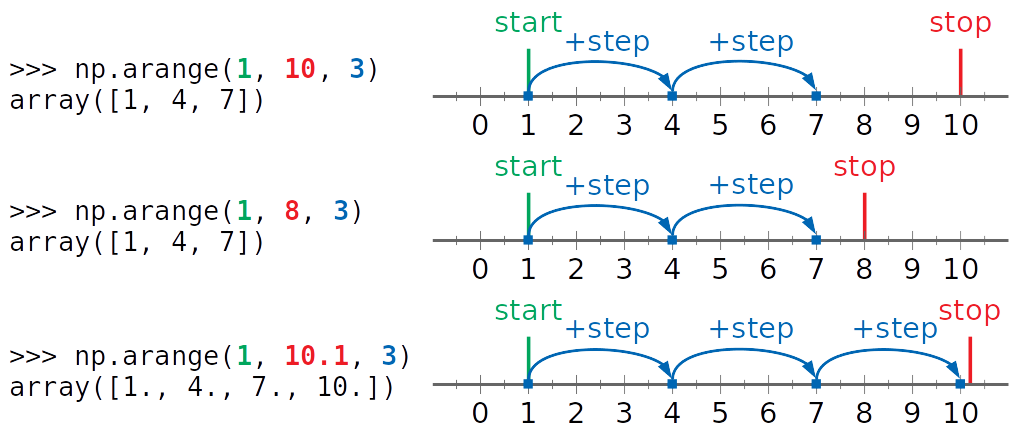

In [51]:
# 1. np.arange([start,] stop[, step,], dtype=None)함수
# ndarray를 생성해주는 함수, range함수와 유사한 함수
# np.arange?
from IPython.display import Image
display(Image("./images/22.데이터분석_numpy_03_arange.png", width=500, height=300))

In [62]:
arr1 = np.arange(10, 20, 2, dtype='float64') # 기본값 dtype=None -> int32
print(type(arr1), '\n', arr1, type(arr1[0]))

# 1) 1차원 ndarray의 indexing, slicing
arr1 = np.arange(10)
print(type(arr1), arr1)
print(type(arr1[9]), arr1[9])
# 0,1,2 추출하기
print(type(arr1[:3]), arr1[:3])
# 3 4 5 6 7 8 9 추출하기
print(type(arr1[3:]), arr1[3:])
# 0 1 2 3 4 5 6 추출하기
print(type(arr1[:7]), arr1[:7])
print(type(arr1[:-3]), arr1[:-3])
# 0 1 2 3 4 5 6 7 8 9 slicing으로 추출
print(type(arr1[:]), arr1[:])

<class 'numpy.ndarray'> 
 [10. 12. 14. 16. 18.] <class 'numpy.float64'>
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.int32'> 9
<class 'numpy.ndarray'> [0 1 2]
<class 'numpy.ndarray'> [3 4 5 6 7 8 9]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]


In [85]:
# 2) 2차원 ndarray의 indexing, slicing
# a. list의 인덱싱과 슬라이싱
l = [[1,2,3],[4,5,6]]
print(l[0][0:2])

arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
# b. numpy의 인덱싱과 슬라이싱 : 2차원[행,요소]의 형태로 처리
# indexing
print(arr2[0,0], arr2[0,1], arr2[0,2]) 
print(arr2[1,0], arr2[1,1], arr2[1,2]) 
print(arr2[2,0], arr2[2,1], arr2[2,2]) 
print()

# c. 2차원의 slicing[:,:]
# 요소꺼내기 : 다차원배열에서 복수개의 요소를 추출하려면 slicing과 함께 컴마를 사용해야 한다.
print(arr2[0,], arr2[0,:]) 
print(arr2[1,], arr2[1,:]) 
print(arr2[2,], arr2[2,:]) 
print()

# 전체행의 전체열을 슬라이싱
print(arr2[:,:]) 

# 실습1. 2번째행의 2번째요소 추출
print(arr2[1,:], arr2[1,1])

# 실습2. 1~2번째행의 1~2번째요소(열)을 추출
print(arr2[:2,:], arr2[:2,:2])
print()

# 전체요소추출
print(arr2, '\n=', arr2[:], '\n=', arr2[:,:])
print()

# 컴마로 추출하는 결과와 없이 추출하는 경우의 차이
print(arr2[2:]) # 2차원
print(arr2[2,]) # 1차원

[1, 2]
1 2 3
4 5 6
7 8 9

[1 2 3] [1 2 3]
[4 5 6] [4 5 6]
[7 8 9] [7 8 9]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4 5 6] 5
[[1 2 3]
 [4 5 6]] [[1 2]
 [4 5]]

[[1 2 3]
 [4 5 6]
 [7 8 9]] 
= [[1 2 3]
 [4 5 6]
 [7 8 9]] 
= [[1 2 3]
 [4 5 6]
 [7 8 9]]

[[7 8 9]]
[7 8 9]


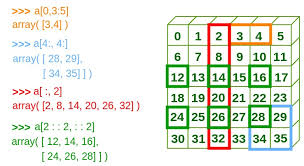

In [86]:
display(Image("./images/22.데이터분석_numpy_04_slicing.png", width=500, height=300))

In [100]:
# 실습문제
arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

# 1. arr2에서 9를 꺼내기 : 세 번째 행의 세 번째 요소
print(arr2[2:,2], '=', arr2[-1:,-1])

# 2. arr2에서 모든열의 세번째 요소 [3,6,9] 출력
print(arr2[:,2])

# 3. arr2에서 [[1,2], [4,5]] 출력
print(arr2[:2,:2])

# 4. arr2에서 [[5,6], [8,9]] 출력
print(arr2[1:,1:])

[9] = [9]
[3 6 9]
[[1 2]
 [4 5]]
[[5 6]
 [8 9]]


In [108]:
m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])

# 5. m 행렬에서 값 7 을 인덱싱한다.
print(m[1,2])

# 6. m 행렬에서 배열 [6, 7] 을 슬라이싱한다.
print(m[1,1:3])

# 7. m 행렬에서 배열 [7, 12] 을 슬라이싱한다.
print(m[1:3,2])

# 8. m 행렬에서 배열 [[3, 4], [8, 9]] 을 슬라이싱한다.
print(m[:2,3:])

7
[6 7]
[ 7 12]
[[3 4]
 [8 9]]


#### 배열인덱싱

* numpy에서 강력한 기능은 `fancy indexing이라 블리는 배열인덱싱`이다.
* indexing이란 이름이 부여 됐지만 사실은 `Database의 SQL기능을 수행`한다.
* 배열인덱싱은 2가지가 있다.
  1. 정수배열인덱싱
  2. 블리언배열인덱싱
* 블리언인덱싱방식은 `배열의 원소가 True or False 2가지 값으로만 구성`되면 인덱스배열의 크기가 원본배열의 크기와 동일해야 한다.

In [116]:
# 1차원 배열인덱싱(블리언)
a = np.array([1,2,3,4,5,6,7,8,9,10])
idx = np.array([False, True, False, True, False, True, False, True, False, True])
print(a, '\n', idx)
print()

print(a[idx])

idx = np.array([True, True, False, True, False, True, False, True, False, False])
print(a[idx])

# 7과 10만 추출
idx = np.array([False, False, False, False, False, False, True, False, False, True])
print(a[idx])

# 짝수만 추출 : a[ 표현식 ]
a = np.array([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10])
print(a%2==0)
print(a[a%2==0])

# 홀수만 추출
print(a[a%3==0])

[ 1  2  3  4  5  6  7  8  9 10] 
 [False  True False  True False  True False  True False  True]

[ 2  4  6  8 10]
[1 2 4 6 8]
[ 7 10]
[False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True]
[ 2  4  6  8 10  2  4  6  8 10]
[3 6 9 3 6 9]


In [122]:
# 2차원 배열인덱싱(블리언)
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9,10,11,12]
])
print(a)

# 실습1. 1,5,9,4,8,12만 추출
print(a[:,[True, False, False, True]])

# 실습2. 2,5,7,10만 추출하기
idx = np.array([
    [False, True, False, False],
    [True, False, True, False],
    [False,True,False,False]
])
print(a[idx])

# 실습3. 짝수만 추출하기
print(a[a%2==0])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  4]
 [ 5  8]
 [ 9 12]]
[ 2  5  7 10]
[ 2  4  6  8 10 12]


### numpy관련함수

#### 1. 한 개의 array에 적용되는 함수

In [138]:
# 1. np.zeros() : 배열의 모든 요소의 값을 0으로 초기화하는 함수
z1 = np.zeros(10)
print(z1)

z2 = np.zeros((3,3))
print(z2)

z3 = np.zeros([3,8])
print(z3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [137]:
# 2. np.ones() : 배열의 모든 요소의 값을 1으로 초기화하는 함수
z1 = np.ones(10)
print(z1)

z2 = np.ones((3,3))
print(z2)

z3 = np.ones([3,8])
print(z3)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [139]:
# 3. np.eye()
z1 = np.eye(3)
print(z1)

z2 = np.eye(3, k=2)
print(z2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [142]:
# 4. np.full() : 특정 값으로 초기화
z1 = np.full((2,2), 10)
print(z1)

z2 = np.full((2,2), [1,2])
print(z2)

[[10 10]
 [10 10]]
[[1 2]
 [1 2]]


In [146]:
# 5. np.arange()
np.arange(10,21,2, dtype='float64')

array([10., 12., 14., 16., 18., 20.])

In [154]:
# 5. np.random()
# 1) seed
np.random.seed(42)
print(np.random.rand(5))
print()

# 2) 난수를 발생시키는 3가지 방법
# a. rand() : 0~1사이의 균등분포를 가진 난수를 발생
print(np.random.rand(10))
print(np.random.rand(3,5))
print()

# b. randn() : 표준정규분포(가우시안)
print(np.random.randn(10))
print(np.random.randn(3,5))
print()

# c. randint() : 균일분포의 정수값의 난수
print(np.random.randint(10))
print(np.random.randint(10, size=10))   # 0~10사이의 1차원(10)배열
print(np.random.randint(10, size=(3,5))) # 0~10사이의 2차원(3x5)배열
print()

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]

[0.15599452 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449
 0.96990985 0.83244264 0.21233911 0.18182497]
[[0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]
 [0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]]

[-1.15099358  0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818
 -0.01349722 -1.05771093  0.82254491 -1.22084365]
[[ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658]
 [ 0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421]
 [-0.46063877  1.05712223  0.34361829 -1.76304016  0.32408397]]

0
[8 6 8 7 0 7 7 2 0 7]
[[2 2 0 4 9]
 [6 9 8 6 8]
 [7 1 0 6 6]]



In [162]:
# 6. np.sign() : 배열의 요소값이 음수=-1, 0=0, 양수=1
np.random.seed(42)
arr1 = np.random.randn(3,5)
print(np.sign(arr1))

[[ 1. -1.  1.  1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1. -1.  1. -1. -1.]]


In [164]:
# 7. np.ceil()
print(arr1)
print(np.ceil(arr1))

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]]
[[ 1. -0.  1.  2. -0.]
 [-0.  2.  1. -0.  1.]
 [-0. -0.  1. -1. -1.]]


In [165]:
# 8. np.floor()
print(np.floor(arr1))

[[ 0. -1.  0.  1. -1.]
 [-1.  1.  0. -1.  0.]
 [-1. -1.  0. -2. -2.]]


In [169]:
# 9. np.isnan()
print(np.isnan(arr1))
np.log(arr1)
print(np.isnan(np.log(arr1)))

[[False False False False False]
 [False False False False False]
 [False False False False False]]
[[False  True False False  True]
 [ True False False  True False]
 [ True  True False  True  True]]


C:\Users\EZEN\AppData\Local\Temp\ipykernel_1740\2249731079.py:3: RuntimeWarning: invalid value encountered in log
  np.log(arr1)
C:\Users\EZEN\AppData\Local\Temp\ipykernel_1740\2249731079.py:4: RuntimeWarning: invalid value encountered in log
  print(np.isnan(np.log(arr1)))


#### 2. 두 개의 array에 적용되는 함수

In [171]:
np.random.seed(42)
arr1 = np.random.randn(5,3)
arr2 = np.random.randn(5,3)
print(arr1, '\n',  arr2)

[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]] 
 [[-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375]]


In [176]:
# 1. 4칙연산함수(add, subtract, multiply, divide)
print(f'np.add = {np.add(arr1, arr2)}')
print(f'np.subtract = {np.subtract(arr1, arr2)}')
print(f'np.multiply = {np.multiply(arr1, arr2)}')
print(f'np.divide = {np.divide(arr1, arr2)}')

np.add = [[-6.55733762e-02 -1.15109542e+00  9.61935871e-01]
 [ 6.15005781e-01 -1.64645708e+00  1.23151181e+00]
 [ 1.35343652e+00  8.34962934e-01 -1.89422257e+00]
 [-1.82268094e-03 -3.52495103e-01 -1.61672333e+00]
 [ 6.17660290e-01 -2.51391893e+00 -2.01661158e+00]]
np.subtract = [[ 1.05900168  0.87456682  0.33344121]
 [ 2.43105393  1.17815033 -1.69978573]
 [ 1.80498912  0.69990652  0.9552738 ]
 [ 1.08694277 -0.57434028  0.68526382]
 [-0.13373575 -1.31264155 -1.43322408]]
np.multiply = [[-0.27929617  0.14003839  0.2035344 ]
 [-1.38294778  0.33069568 -0.34316254]
 [-0.35654883  0.05182349  0.66888278]
 [-0.29536031 -0.05140349  0.53605196]
 [ 0.09090475  1.14919014  0.50314775]]
np.divide = [[-0.88338106  0.13651269  2.06107887]
 [-1.67730118  0.16579534 -0.1597497 ]
 [-6.99459072 11.36465471  0.32951394]
 [-0.99665184 -4.17784776  0.4046328 ]
 [ 0.64403393  3.18540959  5.91345489]]


In [180]:
# 2. minimum/maximum
print(f'numpy배열에서 최소값 = {np.minimum(arr1, arr2)}')
print(f'numpy배열에서 최대값 = {np.maximum(arr1, arr2)}')

numpy배열에서 최소값 = [[-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037  -0.23413696]
 [-0.2257763   0.0675282  -1.42474819]
 [-0.54438272 -0.46341769 -1.15099358]
 [ 0.24196227 -1.91328024 -1.72491783]]
numpy배열에서 최대값 = [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337  1.46564877]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004  0.11092259 -0.46572975]
 [ 0.37569802 -0.60063869 -0.29169375]]


#### 3. 통계함수

In [191]:
# 1. sum()
# np.sum?
arr1 = [[1,2,3],[4,5,6]]
print(np.shape(arr1))
print(arr1)
print(f'numpy 배열의 전체합(axis=None) = {np.sum(arr1)}')
print(f'numpy 배열의 열의합(axis=0) = {np.sum(arr1, axis=0)}')
print(f'numpy 배열의 행의합(axis=1) = {np.sum(arr1, axis=1)}')

(2, 3)
[[1, 2, 3], [4, 5, 6]]
numpy 배열의 전체합(axis=None) = 21
numpy 배열의 열의합(axis=0) = [5 7 9]
numpy 배열의 행의합(axis=1) = [ 6 15]


In [192]:
# 2. mean()
print(f'numpy 배열의 전체 평균(axis=None) = {np.mean(arr1)}')
print(f'numpy 배열의 열의 평균(axis=0) = {np.mean(arr1, axis=0)}')
print(f'numpy 배열의 행의 평균(axis=1) = {np.mean(arr1, axis=1)}')

numpy 배열의 전체 평균(axis=None) = 3.5
numpy 배열의 열의 평균(axis=0) = [2.5 3.5 4.5]
numpy 배열의 행의 평균(axis=1) = [2. 5.]


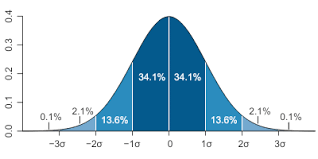

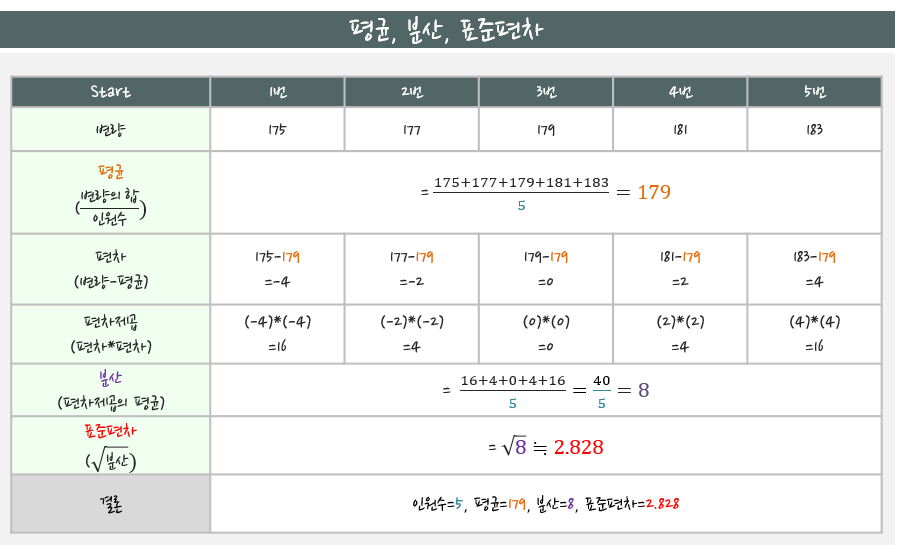

In [193]:
# 3. std(), var(), min(), max(), median(), percentil()
display(Image("./images/22.데이터분석_numpy_05_statistic.png", width=500, height=300))
display(Image("./images/22.데이터분석_numpy_06_statistic.png", width=500, height=300))

In [196]:
# std()
arr1 = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 전체 표준편차(axis=None) = {np.std(arr1)}')
print(f'numpy 배열의 열의 표준편차(axis=0) = {np.std(arr1, axis=0)}')
print(f'numpy 배열의 행의 표준편차(axis=1) = {np.std(arr1, axis=1)}')

numpy 배열의 전체 표준편차(axis=None) = 1.707825127659933
numpy 배열의 열의 표준편차(axis=0) = [1.5 1.5 1.5]
numpy 배열의 행의 표준편차(axis=1) = [0.81649658 0.81649658]


In [197]:
# var()
print(f'numpy 배열의 전체 분산(axis=None) = {np.var(arr1)}')
print(f'numpy 배열의 열의 분산(axis=0) = {np.var(arr1, axis=0)}')
print(f'numpy 배열의 행의 분산(axis=1) = {np.var(arr1, axis=1)}')

numpy 배열의 전체 분산(axis=None) = 2.9166666666666665
numpy 배열의 열의 분산(axis=0) = [2.25 2.25 2.25]
numpy 배열의 행의 분산(axis=1) = [0.66666667 0.66666667]


In [198]:
# min()
print(f'numpy 배열의 전체 최소값(axis=None) = {np.min(arr1)}')
print(f'numpy 배열의 열의 최소값(axis=0) = {np.min(arr1, axis=0)}')
print(f'numpy 배열의 행의 최소값(axis=1) = {np.min(arr1, axis=1)}')

numpy 배열의 전체 최소값(axis=None) = 1
numpy 배열의 열의 최소값(axis=0) = [1 2 3]
numpy 배열의 행의 최소값(axis=1) = [1 4]


In [199]:
# max()
print(f'numpy 배열의 전체 최대값(axis=None) = {np.max(arr1)}')
print(f'numpy 배열의 열의 최대값(axis=0) = {np.max(arr1, axis=0)}')
print(f'numpy 배열의 행의 최대값(axis=1) = {np.max(arr1, axis=1)}')

numpy 배열의 전체 최대값(axis=None) = 6
numpy 배열의 열의 최대값(axis=0) = [4 5 6]
numpy 배열의 행의 최대값(axis=1) = [3 6]


In [200]:
# median()
print(f'numpy 배열의 전체 중앙값(axis=None) = {np.median(arr1)}')
print(f'numpy 배열의 열의 중앙값(axis=0) = {np.median(arr1, axis=0)}')
print(f'numpy 배열의 행의 중앙값(axis=1) = {np.median(arr1, axis=1)}')

numpy 배열의 전체 중앙값(axis=None) = 3.5
numpy 배열의 열의 중앙값(axis=0) = [2.5 3.5 4.5]
numpy 배열의 행의 중앙값(axis=1) = [2. 5.]


In [201]:
# percentile()
print(f'numpy 배열의 전체 1사분위수(array, 사분위수) = {np.percentile(arr1, 25)}')
print(f'numpy 배열의 전체 2사분위수(array, 사분위수) = {np.percentile(arr1, 50)}')
print(f'numpy 배열의 전체 3사분위수(array, 사분위수) = {np.percentile(arr1, 75)}')

numpy 배열의 전체 1사분위수(array, 사분위수) = 2.25
numpy 배열의 전체 2사분위수(array, 사분위수) = 3.5
numpy 배열의 전체 3사분위수(array, 사분위수) = 4.75


In [204]:
# 4. 위치함수 argmin(), argmax()
# 배열의 최소/최대값의 위치
arr1 = [[1,2,3],[4,5,6]]

# a. 전체요소
print(f'numpy 배열의 최소값의 위치 = {np.argmin(arr1)}')
print(f'numpy 배열의 최대값의 위치 = {np.argmax(arr1)}')

# b. 열의 요소
print(f'numpy 배열의 최소값의 위치(axis=0) = {np.argmin(arr1, axis=0)}')
print(f'numpy 배열의 최대값의 위치(axis=0) = {np.argmax(arr1, axis=0)}')

# c. 행의 요소
print(f'numpy 배열의 최소값의 위치(axis=1) = {np.argmin(arr1, axis=1)}')
print(f'numpy 배열의 최대값의 위치(axis=1) = {np.argmax(arr1, axis=1)}')

numpy 배열의 최소값의 위치 = 0
numpy 배열의 최대값의 위치 = 5
numpy 배열의 최소값의 위치(axis=0) = [0 0 0]
numpy 배열의 최대값의 위치(axis=0) = [1 1 1]
numpy 배열의 최소값의 위치(axis=1) = [0 0]
numpy 배열의 최대값의 위치(axis=1) = [2 2]


In [206]:
# 5. np.cumsum() : 누적합 / np.cumprod() : 누적곱

# a. 전체요소
print(f'numpy 배열의 누적합 = {np.cumsum(arr1)}')
print(f'numpy 배열의 누적곱 = {np.cumprod(arr1)}')

# b. 열의 요소
print(f'numpy 배열의 누적합(axis=0) = {np.cumsum(arr1, axis=0)}')
print(f'numpy 배열의 누적곱(axis=0) = {np.cumprod(arr1, axis=0)}')

# c. 행의 요소
print(f'numpy 배열의 누적합(axis=1) = {np.cumsum(arr1, axis=1)}')
print(f'numpy 배열의 누적곱(axis=1) = {np.cumprod(arr1, axis=1)}')

numpy 배열의 누적합 = [ 1  3  6 10 15 21]
numpy 배열의 누적곱 = [  1   2   6  24 120 720]
numpy 배열의 누적합(axis=0) = [[1 2 3]
 [5 7 9]]
numpy 배열의 누적곱(axis=0) = [[ 1  2  3]
 [ 4 10 18]]
numpy 배열의 누적합(axis=1) = [[ 1  3  6]
 [ 4  9 15]]
numpy 배열의 누적곱(axis=1) = [[  1   2   6]
 [  4  20 120]]


#### 4. 기타함수

In [212]:
# 1. sort()
arr = np.array([5,4,3,1,2,6])
# np.sort?
print(f'numpy 배열의 정렬 = {np.sort(arr)}')
print(f'numpy 배열의 원본 = {arr}')
print()

arr = np.array([[5,4,3,1,2,6],['x','a','y','b','z','c']])
# a. 행정렬
print(f'numpy 배열의 정렬 = {np.sort(arr)}')

# b. 특정행만 정렬
print(f'numpy 배열의 특정행만 정렬 = {np.sort(arr[1])}')
print(f'numpy 배열의 특정행만 정렬 = {np.sort(arr)[1]}')

# c. 열 또는 행정렬
arr = np.array([['x','a','y','b','z','c'], [5,4,3,1,2,6]])
print(f'numpy 배열의 정렬(axis=0) = {np.sort(arr, axis=0)}')
print(f'numpy 배열의 정렬(axis=1) = {np.sort(arr, axis=1)}')

numpy 배열의 정렬 = [1 2 3 4 5 6]
numpy 배열의 원본 = [5 4 3 1 2 6]

numpy 배열의 정렬 = [['1' '2' '3' '4' '5' '6']
 ['a' 'b' 'c' 'x' 'y' 'z']]
numpy 배열의 특정행만 정렬 = ['a' 'b' 'c' 'x' 'y' 'z']
numpy 배열의 특정행만 정렬 = ['a' 'b' 'c' 'x' 'y' 'z']
numpy 배열의 정렬(axis=0) = [['5' '4' '3' '1' '2' '6']
 ['x' 'a' 'y' 'b' 'z' 'c']]
numpy 배열의 정렬(axis=1) = [['a' 'b' 'c' 'x' 'y' 'z']
 ['1' '2' '3' '4' '5' '6']]


In [216]:
# 2. unique()
students = np.array(['손흥민','이강인','김민재','소향','나얼','이강인', '손흥민'])

# 1) 1차원배열 중복제거
print(f'1차원배열 중복제거 = {np.unique(students)}')
print(f'1차원배열 원본확인 = {students}')
print()

# 2) 2차원중복제거
values = [[1,2],[1,2],[2,3]]
print(f'2차원배열 중복제거(전체) = {np.unique(values)}')
print(f'2차원배열 중복제거(열:axis=0) = {np.unique(values, axis=0)}')
print(f'2차원배열 중복제거(행:axis=1) = {np.unique(values, axis=1)}')

1차원배열 중복제거 = ['김민재' '나얼' '소향' '손흥민' '이강인']
1차원배열 원본확인 = ['손흥민' '이강인' '김민재' '소향' '나얼' '이강인' '손흥민']

2차원배열 중복제거(전체) = [1 2 3]
2차원배열 중복제거(열:axis=0) = [[1 2]
 [2 3]]
2차원배열 중복제거(행:axis=1) = [[1 2]
 [1 2]
 [2 3]]


#### 5. 파일입출력

* np.savetxt()
* np.loadtxt() - numpy version 1.24.3이후는 genfromtxt()를 사용

In [222]:
# 1. savetxt(filename, data, fmt, delimiter)
numbers = np.zeros([10,4])
numbers

for i in range(10):
    for j in range(4):
        numbers[i][j] = np.random.randint(1000, 4000)
print(numbers)

np.savetxt('./data/np_save.csv', numbers, fmt="%2d", delimiter=',')

[[1870. 3842. 1392. 1206.]
 [2038. 2881. 3939. 2484.]
 [1863. 3790. 1563. 2020.]
 [1095. 2923. 2757. 3532.]
 [3278. 3796. 2678. 1540.]
 [2059. 3572. 2183. 2722.]
 [2819. 3625. 3729. 3604.]
 [2597. 3693. 1795. 2051.]
 [2643. 2363. 2981. 2354.]
 [2663. 2529. 3038. 2496.]]


In [223]:
# 2. loadtxt()
f = np.loadtxt('./data/np_save.csv',  delimiter=',')
print(type(f), '\n', f)

<class 'numpy.ndarray'> 
 [[1870. 3842. 1392. 1206.]
 [2038. 2881. 3939. 2484.]
 [1863. 3790. 1563. 2020.]
 [1095. 2923. 2757. 3532.]
 [3278. 3796. 2678. 1540.]
 [2059. 3572. 2183. 2722.]
 [2819. 3625. 3729. 3604.]
 [2597. 3693. 1795. 2051.]
 [2643. 2363. 2981. 2354.]
 [2663. 2529. 3038. 2496.]]


### 데이터분석실습 - 영화평점데이터
* https://grouplens.org/datasets/movielens
* older datasets중에 `m1-1m.zip`다운 후 `./data/ml-1m`폴더에 압축해제
* np.loadtxt()

In [225]:
# 1. 영화평점데이터로드 : ratings.dat
data = np.genfromtxt('./data/ml-1m/ratings.dat', delimiter='::', dtype=np.int64)

In [231]:
# 5행만 읽어오기
print(f'ratings.dat의 크기 = {data.shape}')
print(type(data))

print(f'첫 5행 = {data[:5]}')
print(f'끝 5행 = {data[-5:]}')

ratings.dat의 크기 = (1000209, 4)
<class 'numpy.ndarray'>
첫 5행 = [[        1      1193         5 978300760]
 [        1       661         3 978302109]
 [        1       914         3 978301968]
 [        1      3408         4 978300275]
 [        1      2355         5 978824291]]
끝 5행 = [[     6040      1091         1 956716541]
 [     6040      1094         5 956704887]
 [     6040       562         5 956704746]
 [     6040      1096         4 956715648]
 [     6040      1097         4 956715569]]


In [247]:
# 실습
# 1. 전체평점의 평균(mean)은?
mean_ratings_total = data[:,2].mean()
print(f'영화전제평점의 평균 = {mean_ratings_total}')

# 2. 사용자ID만 추출(중복제거) - 사용자건수?
user_ids = np.unique(data[:,0])
print(f'전체사용자의 건수 = {user_ids.shape}')

# 3. userid = 1000인 사용자의 데이터만 추출
data_for_user = data[ data[:,0]==1000]
print(f'1000번사용자의 평점건수 = {data_for_user.shape}')

# 4. 1000인 사용자의 전체평점의 평균?
mean_for_user = data_for_user[:,2].mean()
print(f'1000번사용자의 평점의 평균 = {mean_for_user}')

mean_values = []
mean_values.append([1000, mean_for_user])
mean_values

영화전제평점의 평균 = 3.581564453029317
전체사용자의 건수 = (6040,)
1000번사용자의 평점건수 = (84, 4)
1000번사용자의 평점의 평균 = 4.130952380952381


[[1000, 4.130952380952381]]

In [ ]:
# 5. 사용자별 평점평균구하기(list저장)
mean_values = []

for user_id in user_ids:
    # 1. 사용자별데이터
    # if user_id == 1000:
    #     print(data_for_user)
    #     break
    data_for_user = data[ data[:,0]==user_id]

    # 2. 사용자별 전체평균
    mean_for_user = data_for_user[:,2].mean()
    # print(mean_for_user)
    # break
    
    # 3. 사용자별평균을 mean_values[user_id, 평균]에 추가
    mean_values.append([user_id, mean_for_user])
    # if user_id == 3:
    #     print(mean_values)
    #     break

In [266]:
print(mean_values[:5])
print(mean_values[-5:])

[[1, 4.188679245283019], [2, 3.7131782945736433], [3, 3.9019607843137254], [4, 4.190476190476191], [5, 3.1464646464646466]]
[[6036, 3.3029279279279278], [6037, 3.717821782178218], [6038, 3.8], [6039, 3.8780487804878048], [6040, 3.5777126099706744]]


In [273]:
# 6. list자료형을 ndarray로 변환
mean_array = np.array(mean_values, dtype=np.float32)
print(f'전체처리결과건수 = {mean_array.shape}')
print(type(mean_array), mean_array)
mean_array[:5], mean_array[-5:]

전체처리결과건수 = (6040, 2)
<class 'numpy.ndarray'> [[1.0000000e+00 4.1886792e+00]
 [2.0000000e+00 3.7131784e+00]
 [3.0000000e+00 3.9019608e+00]
 ...
 [6.0380000e+03 3.8000000e+00]
 [6.0390000e+03 3.8780489e+00]
 [6.0400000e+03 3.5777125e+00]]


(array([[1.       , 4.188679 ],
        [2.       , 3.7131784],
        [3.       , 3.9019608],
        [4.       , 4.1904764],
        [5.       , 3.1464646]], dtype=float32),
 array([[6.0360000e+03, 3.3029280e+00],
        [6.0370000e+03, 3.7178218e+00],
        [6.0380000e+03, 3.8000000e+00],
        [6.0390000e+03, 3.8780489e+00],
        [6.0400000e+03, 3.5777125e+00]], dtype=float32))

In [274]:
# 7. 처리결과를 csv로 저장 : ./data/ml-1m/user_ratings_mean.csv
np.savetxt('./data/ml-1m/user_ratings_mean.csv'
          , mean_array
          , fmt = '%.2f'
          , delimiter=',')